### Table of contents
#### 1. Import libraries and data set
#### 2. Define task
#### 3. Select sub-data set
#### 4. Check for extreme values
#### 5. Choropleth map - with outliers
#### 6. Address outliers in Florida's Incident rate
#### 7. Choropleth map - without outliers
#### 8. Conclusions

### 1. Import libraries

In [1]:
!pip install folium
import pandas as pd
import folium

In [2]:
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [3]:
# define a path
path = r'/Users/jakubkondelka/Documents/JK_USkillings'

In [4]:
# This command propts matplotlib visuals to appear in the notebook 

%matplotlib inline

In [5]:
# import JSON file containing US states
us_geo = r'/Users/jakubkondelka/Documents/JK_USkillings/02 Data/Original data/us-states.json'

In [6]:
import json
  
# Opening JSON file
f = open(r'/Users/jakubkondelka/Documents/JK_USkillings/02 Data/Original data/us-states.json')
  
# returns JSON object as 
# a dictionary
data = json.load(f)
  
# Iterating through the json
# list
for i in data['features']:
    print(i)
  
# Closing file
f.close()

{'type': 'Feature', 'id': 'AL', 'properties': {'name': 'Alabama'}, 'geometry': {'type': 'Polygon', 'coordinates': [[[-87.359296, 35.00118], [-85.606675, 34.984749], [-85.431413, 34.124869], [-85.184951, 32.859696], [-85.069935, 32.580372], [-84.960397, 32.421541], [-85.004212, 32.322956], [-84.889196, 32.262709], [-85.058981, 32.13674], [-85.053504, 32.01077], [-85.141136, 31.840985], [-85.042551, 31.539753], [-85.113751, 31.27686], [-85.004212, 31.003013], [-85.497137, 30.997536], [-87.600282, 30.997536], [-87.633143, 30.86609], [-87.408589, 30.674397], [-87.446927, 30.510088], [-87.37025, 30.427934], [-87.518128, 30.280057], [-87.655051, 30.247195], [-87.90699, 30.411504], [-87.934375, 30.657966], [-88.011052, 30.685351], [-88.10416, 30.499135], [-88.137022, 30.318396], [-88.394438, 30.367688], [-88.471115, 31.895754], [-88.241084, 33.796253], [-88.098683, 34.891641], [-88.202745, 34.995703], [-87.359296, 35.00118]]]}}
{'type': 'Feature', 'id': 'AK', 'properties': {'name': 'Alaska'},

In [8]:
# import initial data set in pickle
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'Homicides_cleaned.pkl'))



In [13]:
df.head()

,Record ID,Agency Code,Agency Name,Agency Type,City,State,Year,Month,Incident,Crime Type,...,Victim Ethnicity,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon,Victim Count,Perpetrator Count,Record Source
0,1,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,January,1,Murder or Manslaughter,...,Unknown,Male,15.0,Native American/Alaska Native,Unknown,Acquaintance,Blunt Object,0,0,FBI
1,2,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,1,Murder or Manslaughter,...,Unknown,Male,42.0,White,Unknown,Acquaintance,Strangulation,0,0,FBI
2,3,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,2,Murder or Manslaughter,...,Unknown,Unknown,0.0,Unknown,Unknown,Unknown,Unknown,0,0,FBI
3,4,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,1,Murder or Manslaughter,...,Unknown,Male,42.0,White,Unknown,Acquaintance,Strangulation,0,0,FBI
4,5,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,2,Murder or Manslaughter,...,Unknown,Unknown,0.0,Unknown,Unknown,Unknown,Unknown,0,1,FBI


### 2. Define task : I will be creating a map for average deaths per state, from 1980 to 2014. By using averegage deaths per state, I will be able to discount the timeline. 

### 3. Select sub dataset with relevant columns for analysis - State, Year, Incidents

In [9]:
sub = df[['State', 'Year', 'Incident']]

In [10]:
sub

,State,Year,Incident
0,Alaska,1980,1
1,Alaska,1980,1
2,Alaska,1980,2
3,Alaska,1980,1
4,Alaska,1980,2
...,...,...,...
638449,Wyoming,2014,1
638450,Wyoming,2014,1
638451,Wyoming,2014,1
638452,Wyoming,2014,1


### 4. Check for extreme values

<AxesSubplot:xlabel='Incident', ylabel='Count'>

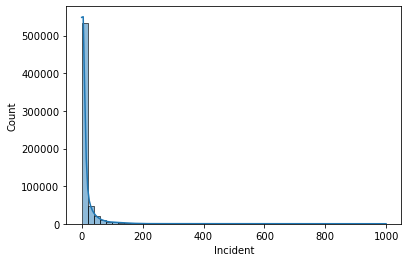

In [11]:
# histogram for incident
sns.histplot(sub['Incident'], bins=50, kde = True) # shows extreme values for 'Incident'

<AxesSubplot:xlabel='Year', ylabel='Count'>

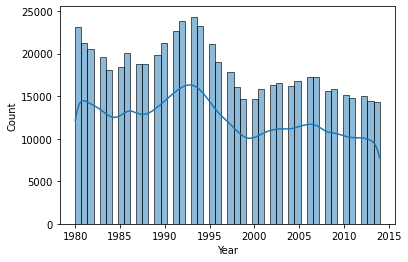

In [12]:
# histogram for Year
sns.histplot(sub['Year'], bins=50, kde = True) # shows extreme values for 'Incident'

#### there are no extreme values. There is a largest number of deaths at count 1, and that is expected

### 5. Create a chloropleth map of deaths per state

In [13]:
# create a subset that consists of State and Incident only

sub2 = sub[['State', 'Incident']]

In [14]:
sub2

,State,Incident
0,Alaska,1
1,Alaska,1
2,Alaska,2
3,Alaska,1
4,Alaska,2
...,...,...
638449,Wyoming,1
638450,Wyoming,1
638451,Wyoming,1
638452,Wyoming,1


In [15]:
sub2.groupby('State').agg({'Incident': ['sum']})

,Incident
,sum
State,
Alabama,38149
Alaska,2704
Arizona,61337
Arkansas,12898
California,1011666
Colorado,15993
Connecticut,8727
Delaware,1592


In [61]:
# add the Sum column to the dataframe, using transform

sub3 = sub2.assign(SUM=sub2.groupby('State').Incident.transform('sum'))

In [62]:
sub3

,State,Incident,SUM
0,Alaska,1,2704
1,Alaska,1,2704
2,Alaska,2,2704
3,Alaska,1,2704
4,Alaska,2,2704
...,...,...,...
638449,Wyoming,1,720
638450,Wyoming,1,720
638451,Wyoming,1,720
638452,Wyoming,1,720


In [67]:
# drop incidents column
sub3 = sub3.drop(columns = ['Incident'])

In [68]:
sub3 = sub3.drop_duplicates(keep='first')

In [69]:
sub3

,State,SUM
0,Alaska,2704
47,Alabama,38149
560,Arkansas,12898
774,Arizona,61337
1067,California,1011666
4657,Colorado,15993
4855,Connecticut,8727
5013,District of Columbia,133621
5193,Delaware,1592
5237,Florida,8100400


In [88]:
sub3.dtypes

State    object
SUM       int64
dtype: object

In [94]:
q75, q25 = np.percentile(sub3['SUM'], [75 ,25])

In [95]:
q75

70471.5

In [96]:
q25

2659.0

In [74]:
# Chloropleth map set up
map = folium.Map(location = [100, 0], zoom_start = 1.5)


folium.Choropleth(
    geo_data = us_geo, 
    data = sub3,
    columns = ['State', 'SUM'],
    key_on = 'feature.properties.name', 
    fill_color = 'YlOrRd', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "Homicides per state").add_to(map)
folium.LayerControl().add_to(map)

map

## 6. Address outliers in Florida's incident count


In [78]:
# Florida is an outlier and makes the map not readable. I will create a subset with only Florida values, to see where the outliers lie and the best solution would be
florida = df[df['State']=='Florida']

In [79]:
florida

,Record ID,Agency Code,Agency Name,Agency Type,City,State,Year,Month,Incident,Crime Type,...,Victim Ethnicity,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon,Victim Count,Perpetrator Count,Record Source
5237,5238,FL00100,Alachua,Sheriff,Alachua,Florida,1980,February,1,Murder or Manslaughter,...,Not Hispanic,Unknown,0.0,Unknown,Unknown,Unknown,Knife,0,0,FBI
5238,5239,FL00100,Alachua,Sheriff,Alachua,Florida,1980,August,1,Murder or Manslaughter,...,Not Hispanic,Male,44.0,Black,Not Hispanic,Stranger,Knife,0,0,FBI
5239,5240,FL00100,Alachua,Sheriff,Alachua,Florida,1980,September,1,Murder or Manslaughter,...,Not Hispanic,Male,34.0,White,Not Hispanic,Wife,Firearm,0,0,FBI
5240,5241,FL00101,Gainesville,Municipal Police,Alachua,Florida,1980,February,1,Murder or Manslaughter,...,Not Hispanic,Male,16.0,Black,Not Hispanic,Stepfather,Rifle,0,0,FBI
5241,5242,FL00101,Gainesville,Municipal Police,Alachua,Florida,1980,March,1,Murder or Manslaughter,...,Not Hispanic,Male,13.0,White,Not Hispanic,Neighbor,Knife,0,0,FBI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
628099,628100,FL06407,Holly Hill,Municipal Police,Volusia,Florida,2014,January,152,Murder or Manslaughter,...,Unknown,Male,25.0,Black,Unknown,Unknown,Blunt Object,0,2,FOIA
628100,628101,FL06412,Port Orange,Municipal Police,Volusia,Florida,2014,March,153,Murder or Manslaughter,...,Unknown,Male,19.0,White,Unknown,Unknown,Knife,0,0,FOIA
628101,628102,FL06413,South Daytona,Municipal Police,Volusia,Florida,2014,May,154,Murder or Manslaughter,...,Unknown,Male,38.0,White,Unknown,Wife,Blunt Object,0,0,FOIA
628102,628103,FL06500,Wakulla County,Sheriff,Wakulla,Florida,2014,October,155,Murder or Manslaughter,...,Unknown,Unknown,0.0,Unknown,Unknown,Unknown,Knife,0,0,FOIA


In [80]:
# aggregate by Year
florida.groupby('Year').agg({'Incident': ['sum']})

,Incident
,sum
Year,
1980,7002
1981,7365
1982,5988
1983,5799
1984,4887
1985,4997
1986,4667
1987,5185


#### Florida has a large spike in homicides starting year 2000. We do not know why. It can be due to different clasification of incidents, using different technology or simply it could be a mistake. It is unlikely that such a spike could occur naturally.

#### I will replace all values greater than 300,000 by Florida's median

In [104]:
# 1st, create NY subset to see if only Florida is affected
NY = df[df['State']=='New York']

In [105]:
NY.groupby('Year').agg({'Incident': ['sum']})

,Incident
,sum
Year,
1980,150323
1981,123429
1982,125023
1983,132321
1984,102696
1985,77533
1986,97250
1987,118713


#### There seesm to be no anomalies, in fact, the data supports history, as NY had a big crime sceen in the 1980s and this was reduced continously. The only outlier looks to be year 2010

In [139]:
# Find median
median = np.median(sub3['SUM'])

In [140]:
median

15506.0

In [141]:
# Florida subset only with Year, Incident
florida2 = florida[['Year', 'Incident']]

In [142]:
florida2

,Year,Incident
5237,1980,1
5238,1980,1
5239,1980,1
5240,1980,1
5241,1980,1
...,...,...
628099,2014,152
628100,2014,153
628101,2014,154
628102,2014,155


In [143]:
# add the Sum column to the dataframe, using transform

florida2 = florida2.assign(SUM=florida2.groupby('Year').Incident.transform('sum'))

In [144]:
florida2

,Year,Incident,SUM
5237,1980,1,7002
5238,1980,1,7002
5239,1980,1,7002
5240,1980,1,7002
5241,1980,1,7002
...,...,...,...
628099,2014,152,511746
628100,2014,153,511746
628101,2014,154,511746
628102,2014,155,511746


In [148]:
# Drop incident column
florida2 = florida2.drop(columns = ['Incident'])

In [149]:
florida2 = florida2.drop_duplicates(keep='first')

In [150]:
florida2

,Year,SUM
5237,1980,7002
27603,1981,7365
48814,1982,5988
69103,1983,5799
88757,1984,4887
106984,1985,4997
125794,1986,4667
145734,1987,5185
225892,1991,1
248547,1992,4219


In [164]:
# Replace with median - 15506 every year after 2000
florida2.loc[florida2['Year'] >= 2000, 'SUM'] = 15506

In [165]:
florida2

,Year,SUM,SUM2
5237,1980,7002,NaN
27603,1981,7365,NaN
48814,1982,5988,NaN
69103,1983,5799,NaN
88757,1984,4887,NaN
106984,1985,4997,NaN
125794,1986,4667,NaN
145734,1987,5185,NaN
225892,1991,1,NaN
248547,1992,4219,NaN


In [163]:
florida.dtypes

Record ID                  int64
Agency Code               object
Agency Name               object
Agency Type               object
City                      object
State                     object
Year                       int64
Month                     object
Incident                   int64
Crime Type                object
Crime Solved              object
Victim Sex                object
Victim Age                 int64
Victim Race               object
Victim Ethnicity          object
Perpetrator Sex           object
Perpetrator Age          float64
Perpetrator Race          object
Perpetrator Ethnicity     object
Relationship              object
Weapon                    object
Victim Count               int64
Perpetrator Count          int64
Record Source             object
dtype: object

In [166]:
florida2['SUM'].sum()

301948

#### Sum of all homicides, after replacing outlies with median is 301948

In [167]:
# replace Florida's 8mil of homicides with 301 948
sub3.loc[sub3['State'] == 'Florida', 'SUM'] = 301948

In [168]:
sub3

,State,SUM
0,Alaska,2704
47,Alabama,38149
560,Arkansas,12898
774,Arizona,61337
1067,California,1011666
4657,Colorado,15993
4855,Connecticut,8727
5013,District of Columbia,133621
5193,Delaware,1592
5237,Florida,301948


In [174]:
# Chloropleth map set up
map = folium.Map(location = [100, 0], zoom_start = 1.5)


folium.Choropleth(
    geo_data = us_geo, 
    data = sub3,
    columns = ['State', 'SUM'],
    key_on = 'feature.properties.name', 
    fill_color = 'YlOrRd', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "Homicides per state").add_to(map)
folium.LayerControl().add_to(map)

map

#### After replacing outlier state of Florida with median, the map is more balanced. However, because of some states with very low numbers of homicides, it still gives only a partial picture of the situation. On the other hand, arranging the rest of the set and replacing or removing outliers could lead to a wrong analysis\

### 8. Conclusion : does this answer some of initial questions?
#### Yes - it does show which states have the highest numbers of homicides. This will require additional analysis of perhapsh choses states, as the range between the number of homicides per state is vast. It is therefore hard to analyse more granular detail on a national level
#### Does the analysis lead you to a new question? Yes - I'd be interested to analyse deeper the state with highest homocided (NY) based on counties and also compare this with a 2nd state (California) to draw a line between similarities or differences